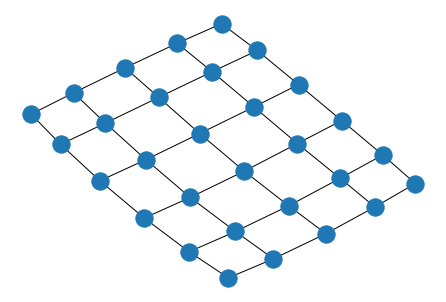

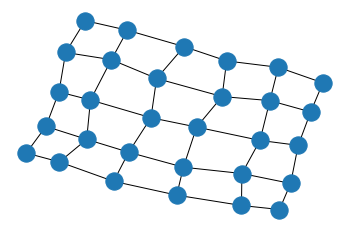

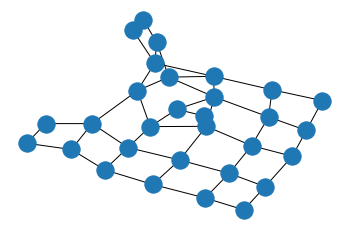

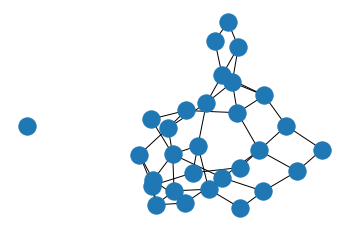

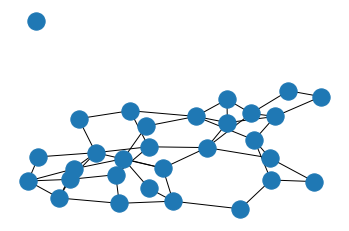

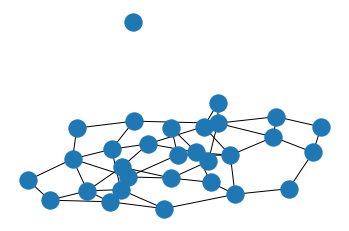

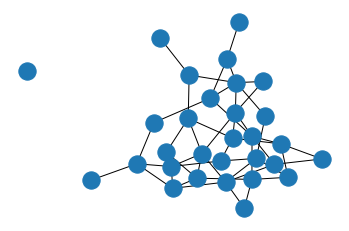

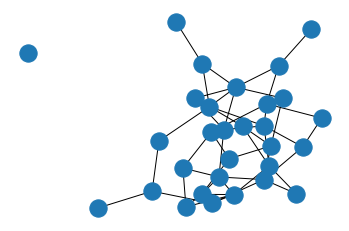

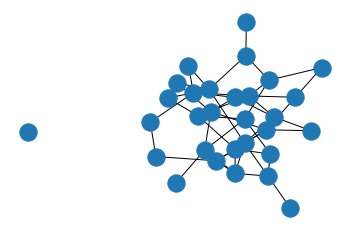

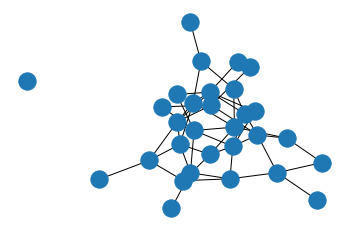

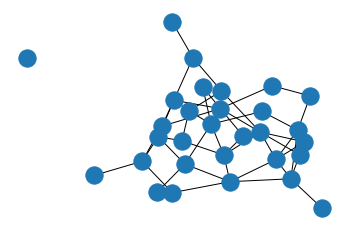

In [2]:
import matplotlib
# matplotlib.use('TkAgg')
%matplotlib inline
from pylab import *
import networkx as nx
import random as rd

#size of rectangles
m, n = 5, 6
k = 4 # number of neighbors of each node

def initialize():
    global g
    g = nx.grid_2d_graph(m, n)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

initialize()
nx.draw(g)
show()
for step in range(1000):
    update()
    if step % 100 == 0:
        observe()
        show()

/Users/ducminhnguyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


m =  1


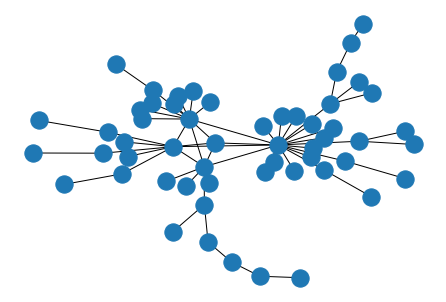

m =  3


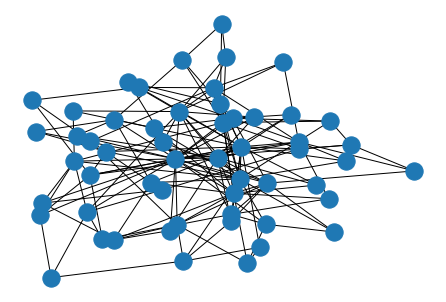

m =  5


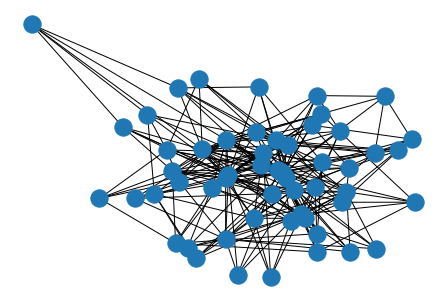

In [3]:
import matplotlib
%matplotlib inline
from pylab import *
import networkx as nx

m0 = 5 # number of nodes in initial condition

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update(m):
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

m_list = [1,3,5] # number of edges per new node

for m in m_list:
    initialize()
    nx.draw(g)
    for step in range(1000):
        update(m)
    observe()
    print("m = ", m)
    show()